# Visualize results of Roslyn built-in code metrics analyzer

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

## Prepare data

Extract values from file

In [2]:
maintainability_index_data = {}
cyclomatic_data = {}
class_coupling_data = {}
loc_data = {}

  
filepath = "../public_analysis_results.json"
with open(filepath, "r") as file:
    json_object = json.load(file)
    projects = [{"project_id": key, **value} for key, value in json_object.items()]
    for project in projects:
        # TODO: constant range
        for i in range(1, len(project)-1):
            # maintainablility index
            score = project[str(i)]["MaintainabilityIndex"]
            project_id = project["project_id"]
            if project_id not in maintainability_index_data:
                maintainability_index_data[project_id] = {}
            maintainability_index_data[project_id][i] = score

            # cyclomatic complexity
            score =  project[str(i)]["CyclomaticComplexity"]
            project_id = project["project_id"]
            if project_id not in cyclomatic_data:
                cyclomatic_data[project_id] = {}
            cyclomatic_data[project_id][i] = score

            # class coupling
            score =  project[str(i)]["ClassCoupling"]
            project_id = project["project_id"]
            if project_id not in class_coupling_data:
                class_coupling_data[project_id] = {}
            class_coupling_data[project_id][i] = score

            # lines of code
            # score =  project[str(i)]["SourceLines"]
            # project_id = project["project_id"]
            # if project_id not in loc_data:
            #     loc_data[project_id] = {}
            # loc_data[project_id][i] = score

print(maintainability_index_data)
print(cyclomatic_data)
print(class_coupling_data)
print(loc_data)

{'OpenRA_OpenRA': {1: 75, 2: 75, 3: 74, 4: 74}, 'GISLab-ELTE_aegis-origin': {1: 73, 2: 73}}
{'OpenRA_OpenRA': {1: 4248, 2: 4312, 3: 4527, 4: 4533}, 'GISLab-ELTE_aegis-origin': {1: 684, 2: 684}}
{'OpenRA_OpenRA': {1: 602, 2: 621, 3: 670, 4: 670}, 'GISLab-ELTE_aegis-origin': {1: 77, 2: 77}}
{}


Convert data

In [3]:
maintainability_index_data = {k: v for k, v in maintainability_index_data.items() if any(vv != 0 for vv in v.values())}
df_maintainability = pd.DataFrame.from_dict(maintainability_index_data, orient='index')
df_maintainability = df_maintainability.sort_index()

cyclomatic_data = {k: v for k, v in cyclomatic_data.items() if any(vv != 0 for vv in v.values())}
df_cyclomatic = pd.DataFrame.from_dict(cyclomatic_data, orient='index')
df_cyclomatic = df_cyclomatic.sort_index()

class_coupling_data = {k: v for k, v in class_coupling_data.items() if any(vv != 0 for vv in v.values())}
df_class_coupling = pd.DataFrame.from_dict(class_coupling_data, orient='index')
df_class_coupling = df_cyclomatic.sort_index()

loc_data = {k: v for k, v in loc_data.items() if any(vv != 0 for vv in v.values())}
df_loc = pd.DataFrame.from_dict(loc_data, orient='index')
df_loc = df_loc.sort_index()

Normalize data

In [4]:
df_maintainability_normalized = df_maintainability.div(df_loc.replace(0, np.nan))
df_cyclomatic_normalized = df_cyclomatic.div(df_loc.replace(0, np.nan))
df_class_coupling_normalized = df_class_coupling.div(df_loc.replace(0, np.nan))

# Plot data
## Maintainablity Index
### Bar chart

<Figure size 1000x500 with 0 Axes>

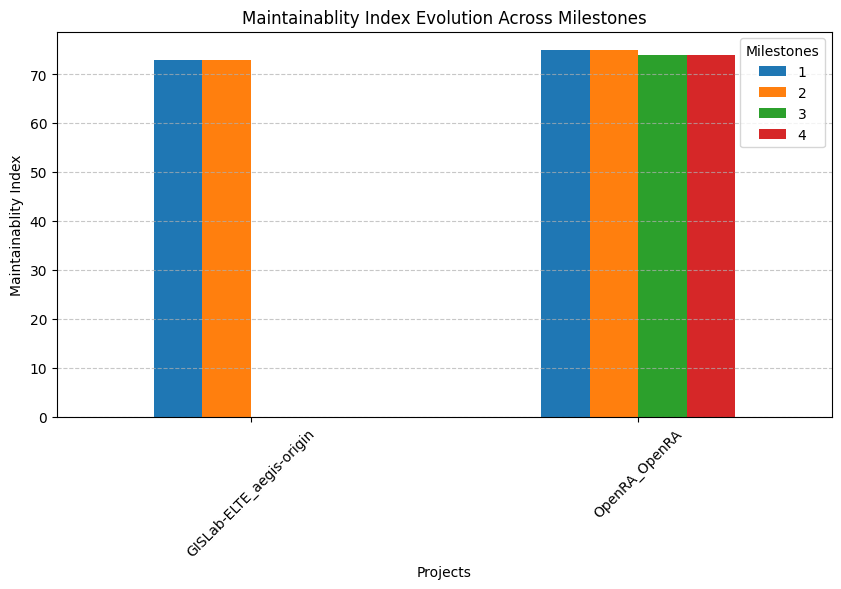

In [5]:
# Plot
plt.figure(figsize=(10, 5))
df_maintainability.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

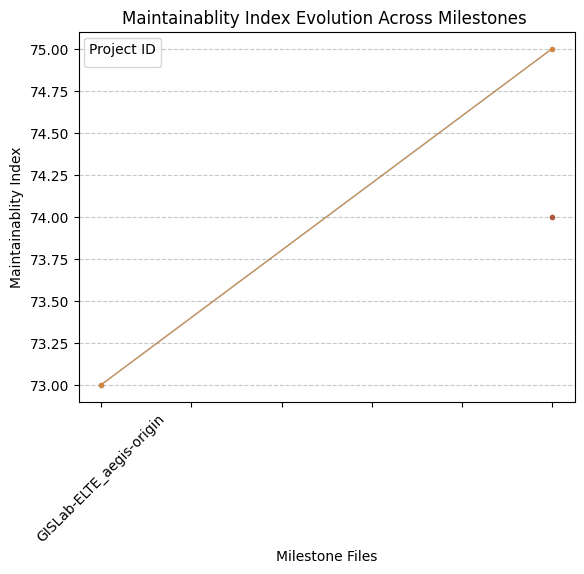

In [6]:
# Plot
plt.figure(figsize=(12, 6))
df_maintainability.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones ")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Heatmap

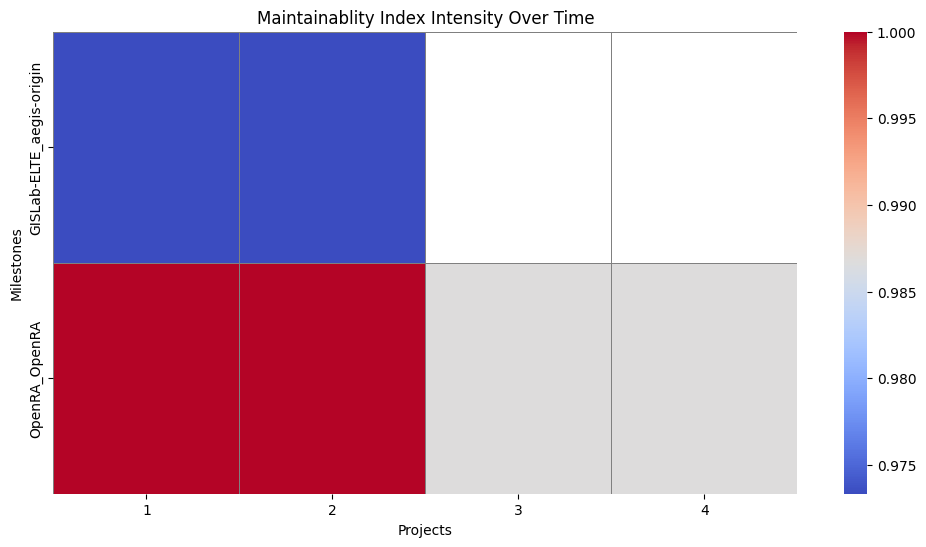

In [7]:
# Normalize values to improve visualization
df_normalized = df_maintainability / df_maintainability.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Maintainablity Index Intensity Over Time")

# Show plot
plt.show()

### Line chart 2

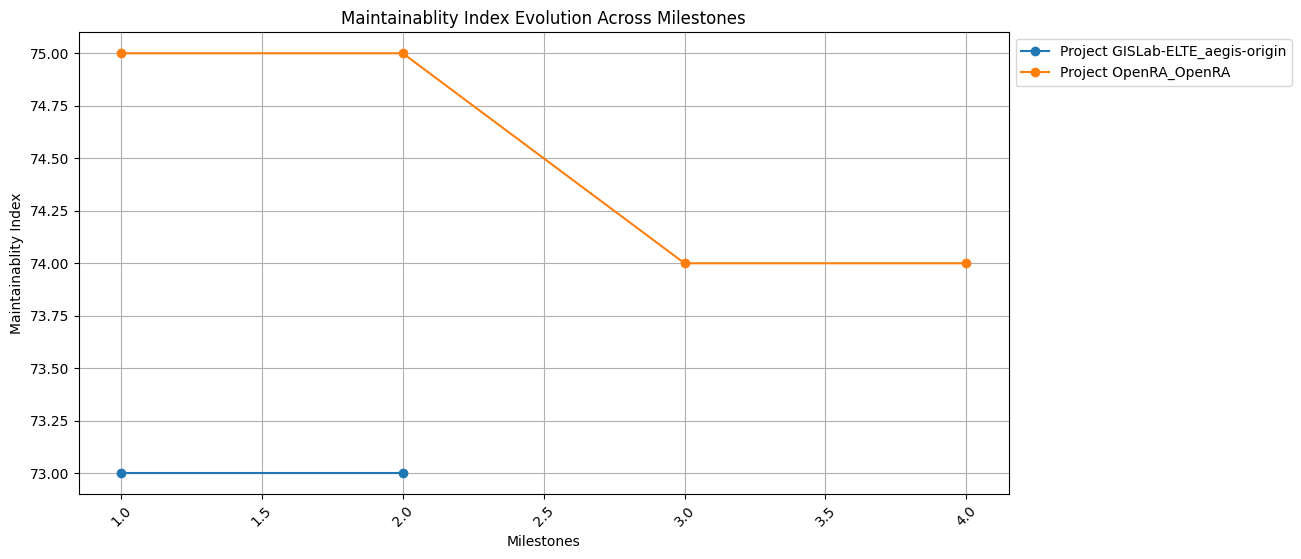

In [8]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_maintainability.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

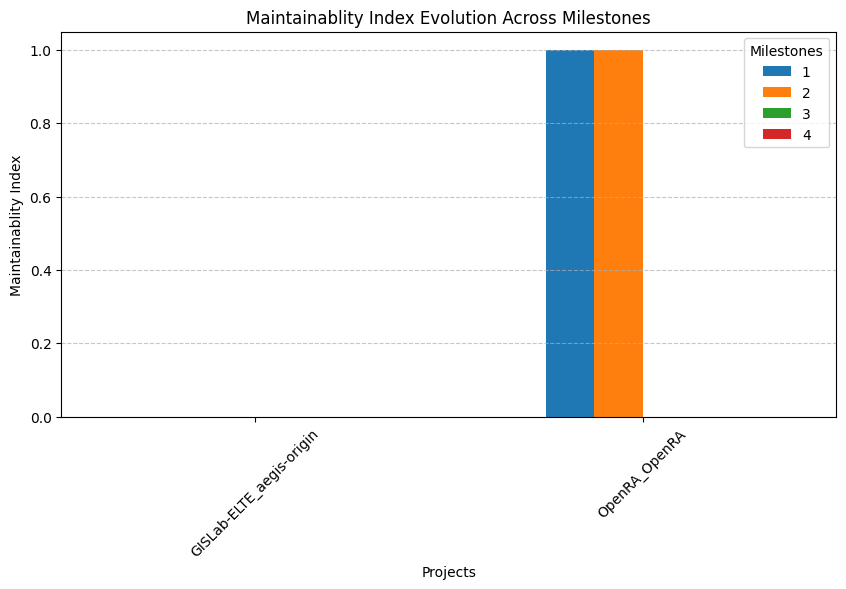

In [9]:
df_maintainability = df_maintainability = (df_maintainability - df_maintainability.min()) / (df_maintainability.max() - df_maintainability.min())

# Plot
plt.figure(figsize=(10, 5))
df_maintainability.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Maintainablity Index")
plt.title("Maintainablity Index Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Cyclomatic complexity
### Bar chart

<Figure size 1000x500 with 0 Axes>

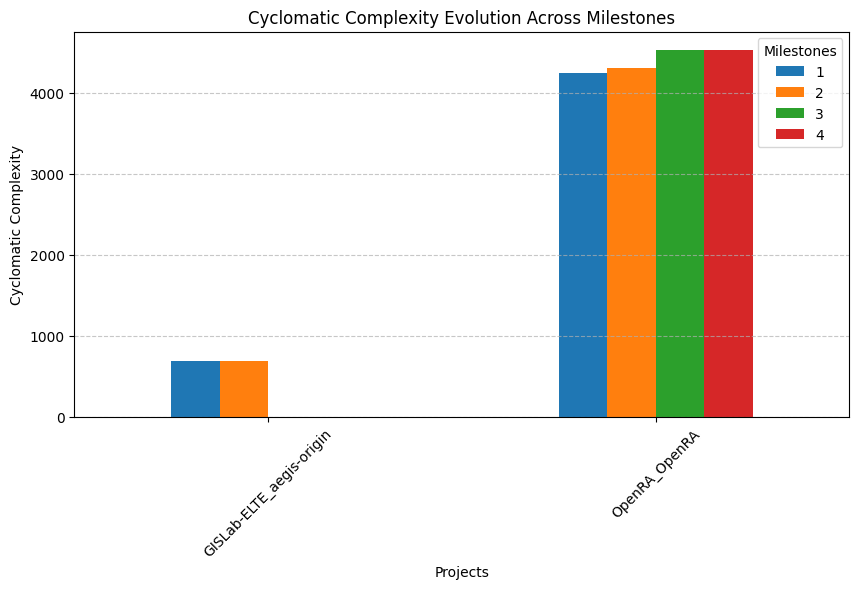

In [10]:
# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

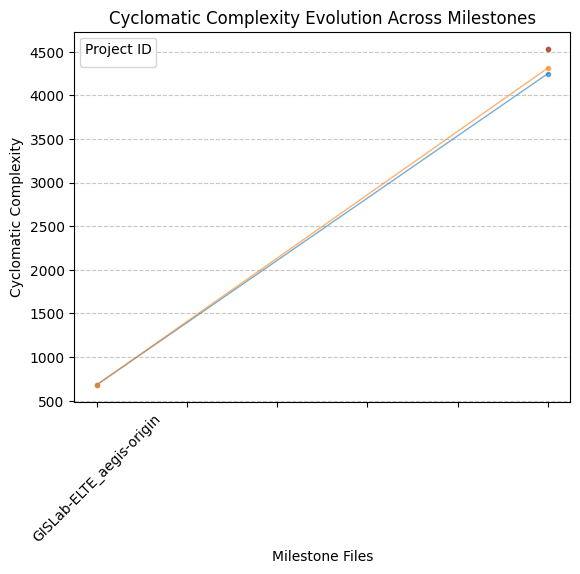

In [11]:
# Plot
plt.figure(figsize=(12, 6))
df_cyclomatic.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

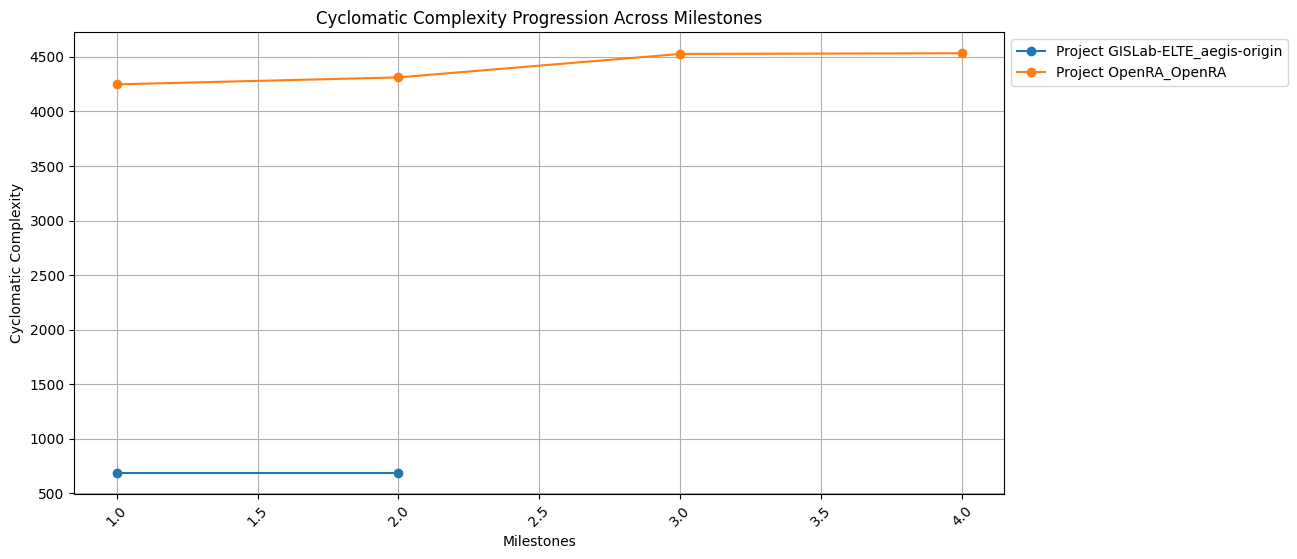

In [12]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_cyclomatic.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

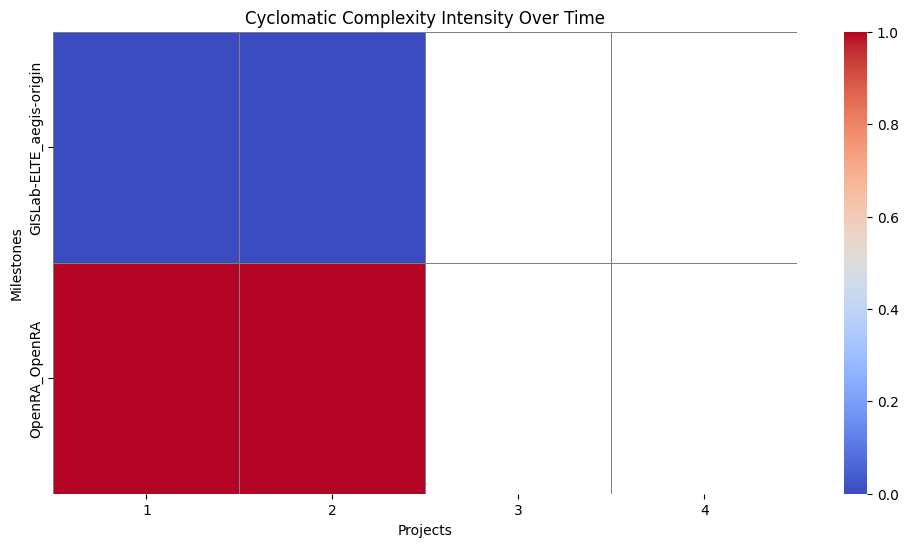

In [13]:
# Normalize values to improve visualization
df_normalized = df_maintainability / df_maintainability.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Cyclomatic Complexity Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

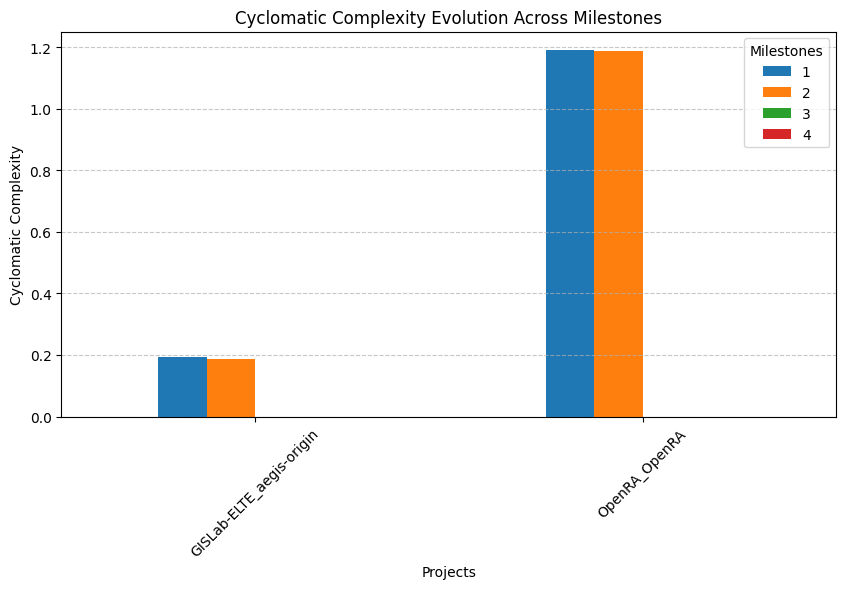

In [14]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Cyclomatic Complexity")
plt.title("Cyclomatic Complexity Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Class coupling

### Bar chart

<Figure size 1000x500 with 0 Axes>

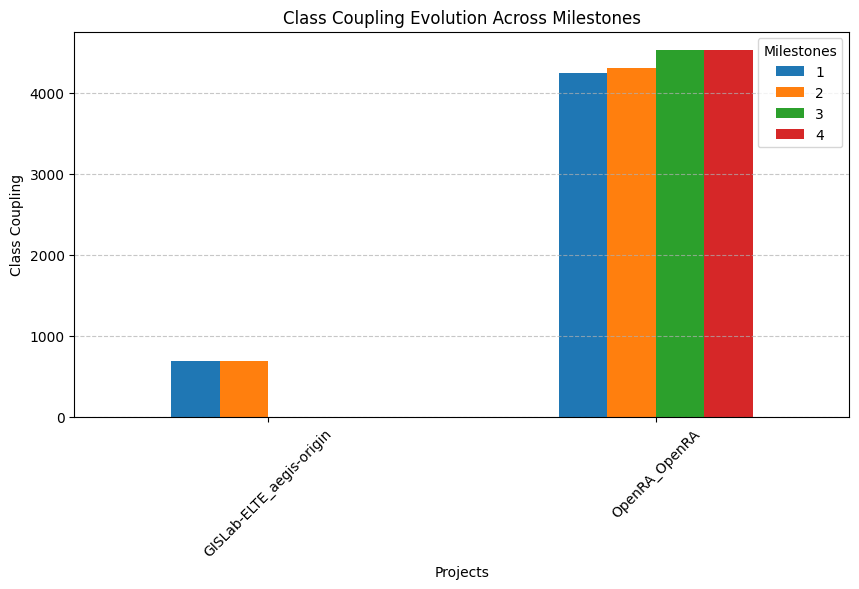

In [15]:
# Plot
plt.figure(figsize=(10, 5))
df_class_coupling.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart

<Figure size 1200x600 with 0 Axes>

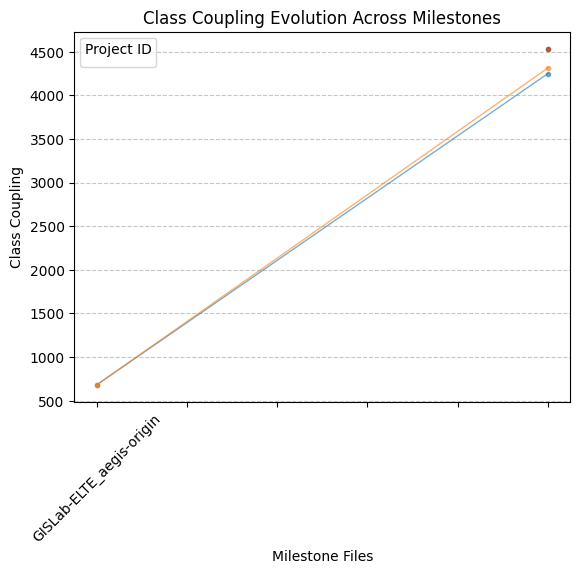

In [16]:
# Plot
plt.figure(figsize=(12, 6))
df_class_coupling.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Line chart 2

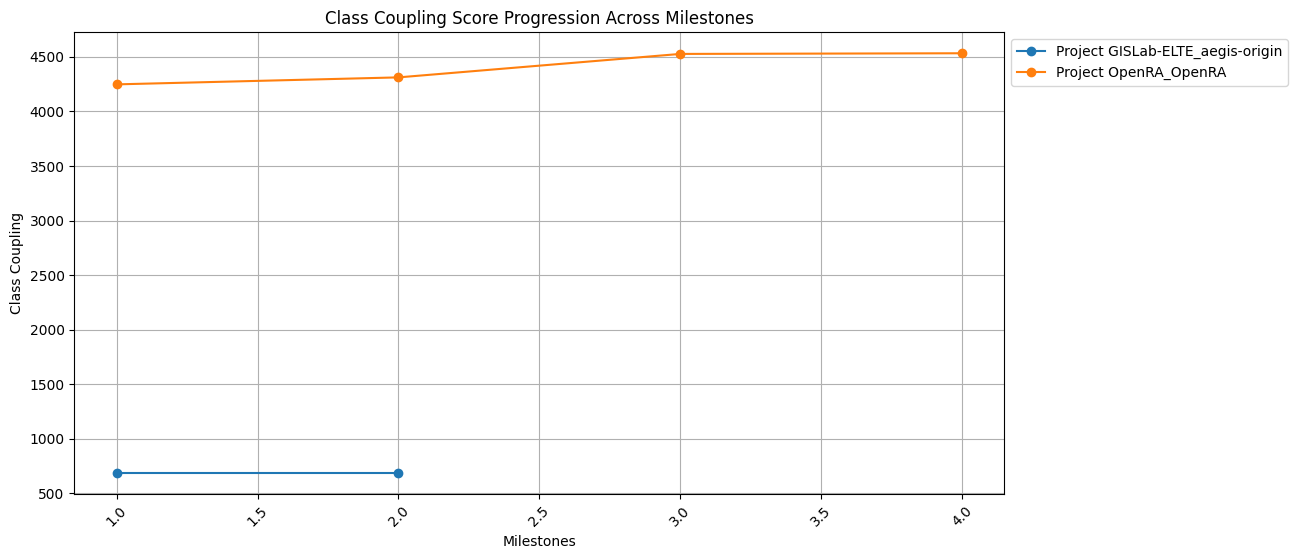

In [17]:
plt.figure(figsize=(12, 6))

for student_id, scores in df_class_coupling.iterrows():
    plt.plot(scores.index, scores.values, marker='o', linestyle='-', label=f"Project {student_id}")

plt.xlabel("Milestones")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Score Progression Across Milestones")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.show()

### Heatmap

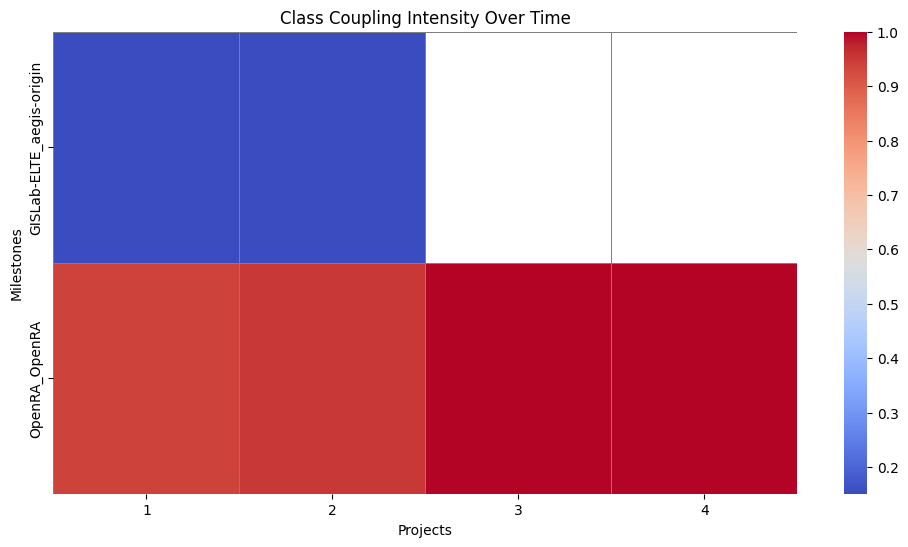

In [18]:
# Normalize values to improve visualization
df_normalized = df_class_coupling / df_class_coupling.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("Class Coupling Intensity Over Time")

# Show plot
plt.show()

### Normalized bar chart

<Figure size 1000x500 with 0 Axes>

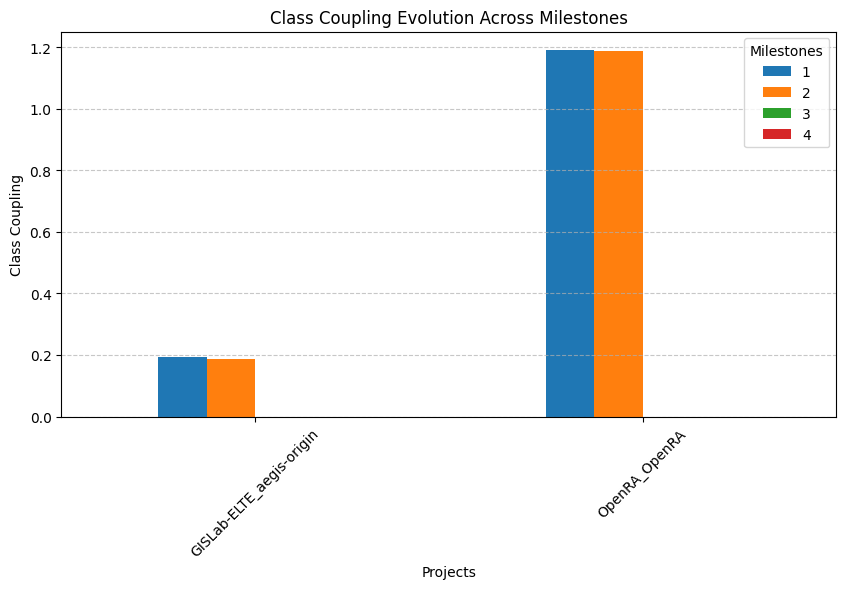

In [19]:
df_cyclomatic = df_cyclomatic / (df_cyclomatic.max() - df_cyclomatic.min())

# Plot
plt.figure(figsize=(10, 5))
df_cyclomatic.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Class Coupling")
plt.title("Class Coupling Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()